In [32]:
import pandas as pd
import xlrd

In [92]:
excel = xlrd.open_workbook('./in_and_out_origin.xls')

In [93]:
excel_df = []
for idx, sheet in enumerate(excel.sheets()):
    df = pd.DataFrame()
    for n in range(sheet.ncols):
        df[sheet.col_values(n)[0]] = sheet.col_values(n)[1:]
    excel_df.append(df)

In [94]:
come_in_df = excel_df[0]
go_out_df = excel_df[1]
in_school_df = excel_df[2]
out_school_df = excel_df[3]

+ 连续出现-120怎么解决
+ 多长时间窗判断模式
+ 如何设置阈值
+ 考虑进门时离天线的距离
+ -120重新赋值

## come in 

In [63]:
come_in_df[0:25]

,手表编号,接收时间,校内天线信号强度,校外天线信号强度,信号强度差值
0,1.0,2017-05-04 15:58:04,-120.0,-88.0,-32.0
1,1.0,2017-05-04 15:58:08,-120.0,-87.0,-33.0
2,1.0,2017-05-04 15:58:10,-120.0,-79.0,-41.0
3,1.0,2017-05-04 15:58:12,-120.0,-79.0,-41.0
4,1.0,2017-05-04 15:58:13,-120.0,-71.0,-49.0
5,1.0,2017-05-04 15:58:14,-120.0,-75.0,-45.0
6,1.0,2017-05-04 15:58:16,-87.0,-78.0,-9.0
7,1.0,2017-05-04 15:58:17,-120.0,-75.0,-45.0
8,1.0,2017-05-04 15:58:18,-89.0,-76.0,-13.0
9,1.0,2017-05-04 15:58:19,-82.0,-83.0,1.0


In [74]:
### 重新赋值-120
invalid_index = come_in_df[come_in_df['校内天线信号强度']==-120].index.values

In [99]:
def handle_invalid(df):
    df_copy = df.copy()
    invalid_index = df_copy[df_copy['校内天线信号强度']==-120].index.values
    for idx in invalid_index[invalid_index>0]:
        df_copy.loc[idx, '校内天线信号强度'] = df_copy.loc[idx-1, '校内天线信号强度']
    invalid_index = df_copy[df_copy['校外天线信号强度']==-120].index.values
    for idx in invalid_index[invalid_index>0]:
        df_copy.loc[idx, '校外天线信号强度'] = df_copy.loc[idx-1, '校外天线信号强度']    
    return df_copy

In [102]:
valid_df = handle_invalid(come_in_df)

In [103]:
valid_df['新信号强度差值'] = valid_df['校内天线信号强度'] - valid_df['校外天线信号强度']

In [118]:
valid_df['接收时间'] = valid_df['接收时间'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [120]:
valid_df

手表编号               float64
接收时间        datetime64[ns]
校内天线信号强度           float64
校外天线信号强度           float64
信号强度差值             float64
新信号强度差值            float64
dtype: object

In [121]:
import matplotlib.pyplot as plt
import datetime

In [131]:
valid_df['手表编号'][30:100]

30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    2.0
48    2.0
49    2.0
50    2.0
51    2.0
52    2.0
53    2.0
54    2.0
55    2.0
56    2.0
57    2.0
58    2.0
59    2.0
     ... 
70    2.0
71    2.0
72    2.0
73    2.0
74    2.0
75    2.0
76    2.0
77    2.0
78    2.0
79    2.0
80    2.0
81    2.0
82    2.0
83    2.0
84    2.0
85    2.0
86    2.0
87    2.0
88    2.0
89    2.0
90    2.0
91    2.0
92    2.0
93    2.0
94    2.0
95    2.0
96    2.0
97    3.0
98    3.0
99    3.0
Name: 手表编号, dtype: float64

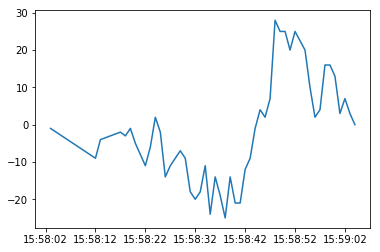

In [134]:
plt.plot(valid_df['接收时间'][47:96], valid_df['新信号强度差值'][47:96])
plt.show()

In [126]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('zbbyr', 'zb19900915*')
trace1 = {
  "x": valid_df['接收时间'][0:45],
  "y": valid_df['新信号强度差值'][0:45], 
  "type": "scatter"
}
data = Data([trace1])
layout = {
  "title": "HSBC Closing Stock Price PCT", 
  "xaxis": {
    "title": "Date", 
    "titlefont": {
      "color": "#7f7f7f", 
      "family": "Courier New, monospace", 
      "size": 18
    }
  }, 
  "yaxis": {
    "title": "GBP", 
    "titlefont": {
      "color": "#7f7f7f", 
      "family": "Courier New, monospace", 
      "size": 18
    }
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

PlotlyError: Sign in failed.